Installs the Kaggle CLI plus all the NLP libraries (Hugging Face Transformers, the Datasets lib, ROUGE/BERTScore, and SentencePiece) that we’ll need

In [ ]:
!pip install --quiet kaggle transformers datasets rouge_score bert_score sentencepiece

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:0

In [ ]:
!pip install --quiet openpyxl

In [ ]:
import pandas as pd
df = pd.read_excel("/content/Inshorts Cleaned Data.xlsx", sheet_name=0, engine="openpyxl")
print("Loaded DataFrame shape:", df.shape)
df.head()


Loaded DataFrame shape: (55104, 5)


,Headline,Short,Source,Time,Publish Date
0,4 ex-bank officials booked for cheating bank o...,The CBI on Saturday booked four former officia...,The New Indian Express,09:25:00,2017-03-26
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme C...,Outlook,22:18:00,2017-03-25
2,"At least 3 killed, 30 injured in blast in Sylh...","At least three people were killed, including a...",Hindustan Times,23:39:00,2017-03-25
3,Why has Reliance been barred from trading in f...,Mukesh Ambani-led Reliance Industries (RIL) wa...,Livemint,23:08:00,2017-03-25
4,Was stopped from entering my own studio at Tim...,TV news anchor Arnab Goswami has said he was t...,YouTube,23:24:00,2017-03-25


In [ ]:
# 2. Column list & missing‑value check
print("Columns:", df.columns.tolist())
print("Nulls per column:\n", df.isnull().sum())

Columns: ['Headline', 'Short', 'Source ', 'Time ', 'Publish Date']
Nulls per column:
 Headline        0
Short           0
Source          0
Time            0
Publish Date    0
dtype: int64


In [ ]:
df.rename(columns={'Source ': 'Source'}, inplace=True)

In [ ]:
# 3. Source breakdown (instead of 'category')
print("Examples per news source:\n", df['Source'].value_counts())

Examples per news source:
 Source
YouTube              4693
India Today          4578
Hindustan Times      4219
The Guardian         3306
PTI                  3256
                     ... 
Energy Voice            1
Save the Internet       1
InB Ministry            1
Gizbot                  1
IANS                    1
Name: count, Length: 1471, dtype: int64


In [ ]:
# 4. Compute word counts for article vs. summary
df['article_len'] = df['Short'].astype(str).str.split().apply(len)
df['summary_len'] = df['Headline'].astype(str).str.split().apply(len)
df[['article_len','summary_len']].describe()

,article_len,summary_len
count,55104.000000,55104.000000
mean,58.180804,8.255898
std,2.410549,1.540014
min,40.000000,1.000000
25%,57.000000,7.000000
50%,59.000000,8.000000
75%,60.000000,9.000000
max,67.000000,14.000000


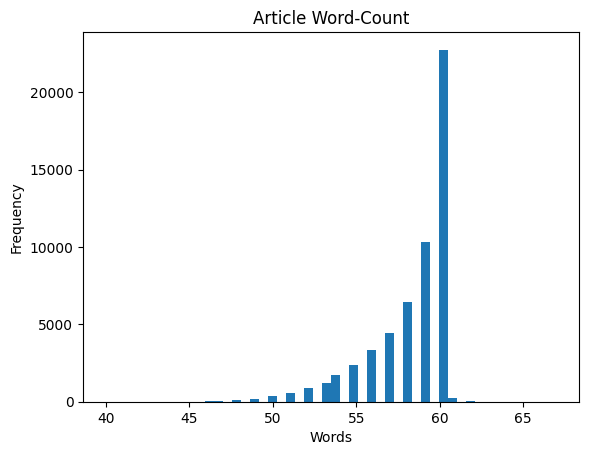

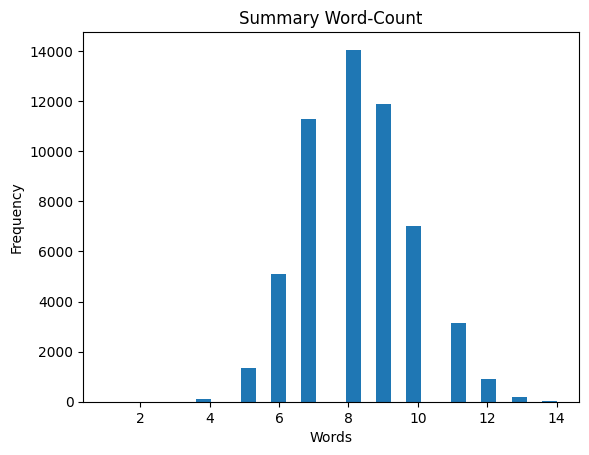

In [ ]:
# 5. Visualize length distributions
import matplotlib.pyplot as plt

plt.hist(df['article_len'], bins=50)
plt.title("Article Word‑Count")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

plt.hist(df['summary_len'], bins=30)
plt.title("Summary Word‑Count")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Remove rows where Article or Headline is missing, and drop duplicates
df = df.dropna(subset=['Short','Headline']).drop_duplicates()
print("After cleaning:", df.shape)

After cleaning: (55015, 7)


In [ ]:
import re

def clean_text(text):
    text = text.strip()                      # remove leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text)         # collapse multiple spaces/newlines
    return text

df['Short']    = df['Short'].astype(str).apply(clean_text)
df['Headline'] = df['Headline'].astype(str).apply(clean_text)

In [ ]:
# 1. Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# 2. Install/upgrade necessary packages
!pip install --quiet transformers datasets evaluate rouge_score bert_score sentencepiece textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.0 MB/s eta 0:00:00


In [ ]:
# 2. Install/upgrade necessary packages
!pip install --quiet transformers datasets evaluate rouge_score bert_score sentencepiece textstat


In [ ]:
# 3. Reload & preprocess your data (if you need to start from the split)
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Excel
df = pd.read_excel("/content/Inshorts Cleaned Data.xlsx", sheet_name=0)
df = df.dropna(subset=['Short','Headline']).drop_duplicates()

# Split
train_df, temp_df = train_test_split(df, test_size=0.20, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42)

# Convert to 🤗 datasets
from datasets import Dataset
train_ds = Dataset.from_pandas(train_df[['Short','Headline']], preserve_index=False)
val_ds   = Dataset.from_pandas(val_df[['Short','Headline']],   preserve_index=False)
test_ds  = Dataset.from_pandas(test_df[['Short','Headline']],  preserve_index=False)

In [ ]:
# 4. Tokenize for T5
from transformers import T5TokenizerFast

tokenizer = T5TokenizerFast.from_pretrained('t5-small')
max_input_length  = 128
max_target_length = 32

def preprocess_t5(examples):
    inputs = ['summarize: ' + txt for txt in examples['Short']]
    model_inputs = tokenizer(inputs,
                             max_length=max_input_length,
                             truncation=True,
                             padding='max_length')
    labels = tokenizer(examples['Headline'],
                       max_length=max_target_length,
                       truncation=True,
                       padding='max_length')
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

train_tok = train_ds.map(preprocess_t5, batched=True, remove_columns=['Short','Headline'])
val_tok   = val_ds.map(  preprocess_t5, batched=True, remove_columns=['Short','Headline'])
test_tok  = test_ds.map( preprocess_t5, batched=True, remove_columns=['Short','Headline'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Map:   0%|          | 0/44012 [00:00<?, ? examples/s]

Map:   0%|          | 0/5501 [00:00<?, ? examples/s]

Map:   0%|          | 0/5502 [00:00<?, ? examples/s]

In [ ]:
# === GPU-friendly Trainer Setup & Fine-Tuning ===

from transformers import (
    T5ForConditionalGeneration,
    T5TokenizerFast,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer,
    DataCollatorForSeq2Seq
)
import evaluate
import numpy as np

# 1. Load model & tokenizer
model     = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5TokenizerFast.from_pretrained('t5-small')

# 2. Prepare ROUGE metric & compute_metrics
rouge = evaluate.load('rouge')
def compute_metrics(eval_pred):
    preds, labels = eval_pred
    decoded_preds  = tokenizer.batch_decode(preds, skip_special_tokens=True)
    # replace -100 in labels (padding) with pad token id
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    res = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    return {
        'rouge1': res['rouge1'],
        'rouge2': res['rouge2'],
        'rougeL': res['rougeL'],
    }

# 3. GPU-friendly training args (legacy style)
training_args = Seq2SeqTrainingArguments(
    output_dir                  = '/content/drive/MyDrive/t5-inshorts-checkpoints',
    num_train_epochs            = 3,
    per_device_train_batch_size = 4,
    per_device_eval_batch_size  = 4,
    gradient_accumulation_steps = 4,
    learning_rate               = 5e-5,
    weight_decay                = 0.01,
    save_total_limit            = 2,

    do_train      = True,
    do_eval       = True,
    logging_steps = 500,
    eval_steps    = 1000,
    save_steps    = 1000,

    predict_with_generate = True,
    fp16                  = True,     # enable mixed-precision on GPU
    report_to             = "none",   # no W&B
    seed                  = 42,
)

# 4. Build Trainer
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)
trainer = Seq2SeqTrainer(
    model           = model,
    args            = training_args,
    train_dataset   = train_tok,
    eval_dataset    = val_tok,
    tokenizer       = tokenizer,
    data_collator   = data_collator,
    compute_metrics = compute_metrics,
)

print(model)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

<ipython-input-16-727bf90c6535>:242: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:
# 5. Train!
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
500,1.431000
1000,0.895200
1500,0.852700
2000,0.832700
2500,0.809000
3000,0.793100
3500,0.772100
4000,0.767000
4500,0.770800
5000,0.768300


TrainOutput(global_step=8250, training_loss=0.8185589007753314, metrics={'train_runtime': 2591.7416, 'train_samples_per_second': 50.945, 'train_steps_per_second': 3.183, 'total_flos': 4466008764973056.0, 'train_loss': 0.8185589007753314, 'epoch': 2.999000272652913})

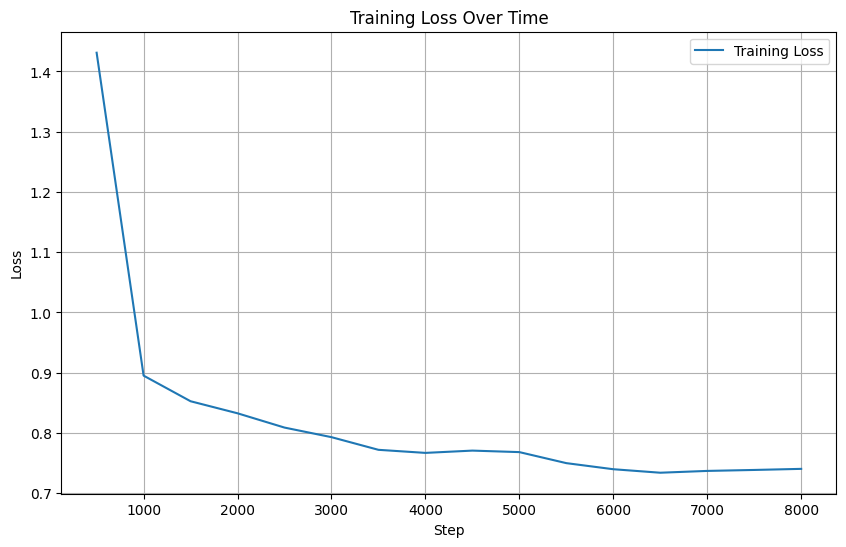

In [ ]:
import matplotlib.pyplot as plt

# Extract log history from trainer
logs = trainer.state.log_history

# Prepare lists for training loss
train_steps, train_losses = [], []

for log in logs:
    if 'loss' in log and 'step' in log:
        train_steps.append(log['step'])
        train_losses.append(log['loss'])

# Plotting training loss
plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, label='Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# === GPU-friendly Evaluation via manual generation ===

import torch
from torch.utils.data import DataLoader
import numpy as np
import evaluate
import textstat

# 1. Prepare device & model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# 2. Prepare DataLoader on your tokenized test set
test_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_loader = DataLoader(test_tok, batch_size=8, shuffle=False)

all_preds = []
all_labels = []

# 3. Loop over test batches and generate
with torch.no_grad():
    for batch in test_loader:
        input_ids      = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        gen_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=32,
            num_beams=4,
            early_stopping=True
        )
        all_preds.extend(gen_ids.cpu().tolist())
        all_labels.extend(batch["labels"].cpu().tolist())

# 4. Decode to text
decoded_preds  = tokenizer.batch_decode(all_preds,  skip_special_tokens=True)
decoded_labels = tokenizer.batch_decode(all_labels, skip_special_tokens=True)

# 5. Compute ROUGE
rouge     = evaluate.load("rouge")
rouge_res = rouge.compute(
    predictions=decoded_preds,
    references=decoded_labels,
    use_stemmer=True
)
print(f"ROUGE-1: {rouge_res['rouge1']:.4f}")
print(f"ROUGE-2: {rouge_res['rouge2']:.4f}")
print(f"ROUGE-L: {rouge_res['rougeL']:.4f}")

# 6. Compute BERTScore
# 6. Compute BERTScore (fixed for Python lists)
import numpy as np

bertscore = evaluate.load("bertscore")
bs_res = bertscore.compute(
    predictions=decoded_preds,
    references=decoded_labels,
    lang="en"
)
precision = np.mean(bs_res['precision'])
recall    = np.mean(bs_res['recall'])
f1        = np.mean(bs_res['f1'])
print(f"BERTScore — P: {precision:.4f}, R: {recall:.4f}, F1: {f1:.4f}")

# 7. Readability (Flesch-Kincaid Grade)
fk_pred  = [textstat.flesch_kincaid_grade(s) for s in decoded_preds]
fk_label = [textstat.flesch_kincaid_grade(r) for r in decoded_labels]
print("Avg FK Grade — Generated:", round(np.mean(fk_pred),2),
      "| Reference:", round(np.mean(fk_label),2))

# 8. Spot-check examples
for i in range(5):
    print(f"\n— Example {i+1} —")
    print("Article:   ", test_df.iloc[i]["Short"])
    print("Reference: ", decoded_labels[i])
    print("Generated: ", decoded_preds[i])


ROUGE-1: 0.5365
ROUGE-2: 0.3026
ROUGE-L: 0.4973


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore — P: 0.9071, R: 0.9064, F1: 0.9061
Avg FK Grade — Generated: 8.21 | Reference: 7.34

— Example 1 —
Article:    A refugee relief organization arranges football matches for youth and unaccompanied minors living in Syrian refugee camps in France. The matches feature 12-18 year-olds, 80% of whom have none taking care of them. &#34;Sport has given them a chance to break free from the camp, forget about the past, the present and the future, to be themselves&#34;, an official said.
Reference:  Soccer games organized for young Syrian refugees
Generated:  Soccer matches for youth, unaccompanied minors in France

— Example 2 —
Article:    The Court of Arbitration for Sport has rejected the appeal filed by the Russian Olympic Committee against the suspension of the country&#39;s track and field athletes from Rio Olympics. The suspension was imposed after reports found evidence of widespread doping in Russian sports. Further, the IOC is considering banning all Russian players from the Ol

**GPT-2 Code**

In [ ]:
# 1. Install / import
!pip install --quiet transformers datasets evaluate textstat

import os
import torch
import numpy as np
from datasets import Dataset
from torch.utils.data import DataLoader
from transformers import (
    GPT2Tokenizer,
    GPT2LMHeadModel,
    Trainer,
    TrainingArguments,
)
import evaluate, textstat


In [ ]:
# 2. Load GPT-2 + configure padding
tokenizer_gpt = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer_gpt.pad_token     = tokenizer_gpt.eos_token
tokenizer_gpt.padding_side  = "left"

model_gpt = GPT2LMHeadModel.from_pretrained("gpt2")
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_gpt.to(device)


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
# 3. Convert pandas to Datasets
train_ds_gpt = Dataset.from_pandas(train_df[["Short","Headline"]], preserve_index=False)
val_ds_gpt   = Dataset.from_pandas(val_df[["Short","Headline"]],   preserve_index=False)
test_ds_gpt  = Dataset.from_pandas(test_df[["Short","Headline"]],  preserve_index=False)


In [ ]:
# 4. Preprocessing: article-only inputs (128 tokens) + summary-only labels (32 tokens)
max_input_len   = 128
max_summary_len = 32
max_total_len   = max_input_len + max_summary_len

def preprocess_gpt(examples):
    # tokenize article
    art = tokenizer_gpt(
        examples["Short"],
        max_length=max_input_len,
        truncation=True,
        padding="max_length"
    )["input_ids"]

    # tokenize summary
    summ = tokenizer_gpt(
        examples["Headline"],
        max_length=max_summary_len,
        truncation=True,
        padding="max_length"
    )["input_ids"]

    input_ids = []
    attention_mask = []
    labels = []

    for a_ids, s_ids in zip(art, summ):
        # combine sequences
        comb_ids = a_ids + s_ids
        input_ids.append(comb_ids)
        # mask = 1 for all tokens
        attention_mask.append([1]*len(comb_ids))
        # label: -100 for article positions, then summary ids
        labels.append([-100]*max_input_len + s_ids)

    return {
        "input_ids":      input_ids,
        "attention_mask": attention_mask,
        "labels":         labels,
    }

# map across splits
train_tok_gpt = train_ds_gpt.map(preprocess_gpt, batched=True, remove_columns=["Short","Headline"])
val_tok_gpt   = val_ds_gpt.map(  preprocess_gpt, batched=True, remove_columns=["Short","Headline"])
test_tok_gpt  = test_ds_gpt.map( preprocess_gpt, batched=True, remove_columns=["Short","Headline"])


Map:   0%|          | 0/44012 [00:00<?, ? examples/s]

Map:   0%|          | 0/5501 [00:00<?, ? examples/s]

Map:   0%|          | 0/5502 [00:00<?, ? examples/s]

In [ ]:
# 5. Set up training (legacy args for your TF version)
training_args_gpt = TrainingArguments(
    output_dir                  = "/content/drive/MyDrive/gpt2-inshorts",
    num_train_epochs            = 3,
    per_device_train_batch_size = 4,
    per_device_eval_batch_size  = 4,
    learning_rate               = 5e-5,
    weight_decay                = 0.01,
    save_total_limit            = 2,
    do_train      = True,
    do_eval       = True,
    logging_steps = 500,
    eval_steps    = 1000,
    save_steps    = 1000,
    fp16          = True,
    report_to     = "none",
    seed          = 42,
)

trainer_gpt = Trainer(
    model           = model_gpt,
    args            = training_args_gpt,
    train_dataset   = train_tok_gpt,
    eval_dataset    = val_tok_gpt,
    tokenizer       = tokenizer_gpt,
)


<ipython-input-29-5a131b119c45>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_gpt = Trainer(


In [ ]:
trainer_gpt.train()


{'loss': 1.1734, 'grad_norm': 6.235629081726074, 'learning_rate': 4.925474870489867e-05, 'epoch': 0.04544215214032537}
{'loss': 0.8713, 'grad_norm': 4.853418350219727, 'learning_rate': 4.849737950255991e-05, 'epoch': 0.09088430428065074}
{'loss': 0.8351, 'grad_norm': 3.700261116027832, 'learning_rate': 4.774001030022115e-05, 'epoch': 0.1363264564209761}
{'loss': 0.7881, 'grad_norm': 3.1503043174743652, 'learning_rate': 4.6982641097882394e-05, 'epoch': 0.18176860856130148}
{'loss': 0.7712, 'grad_norm': 3.6815946102142334, 'learning_rate': 4.622527189554364e-05, 'epoch': 0.22721076070162682}
{'loss': 0.7509, 'grad_norm': 3.060854196548462, 'learning_rate': 4.5467902693204884e-05, 'epoch': 0.2726529128419522}
{'loss': 0.749, 'grad_norm': 1.8840395212173462, 'learning_rate': 4.471053349086613e-05, 'epoch': 0.3180950649822776}
{'loss': 0.7453, 'grad_norm': 2.6254844665527344, 'learning_rate': 4.395316428852737e-05, 'epoch': 0.36353721712260295}
{'loss': 0.7391, 'grad_norm': 3.39204645156860

TrainOutput(global_step=33009, training_loss=0.5738587608563911, metrics={'train_runtime': 4573.0262, 'train_samples_per_second': 28.873, 'train_steps_per_second': 7.218, 'train_loss': 0.5738587608563911, 'epoch': 3.0})

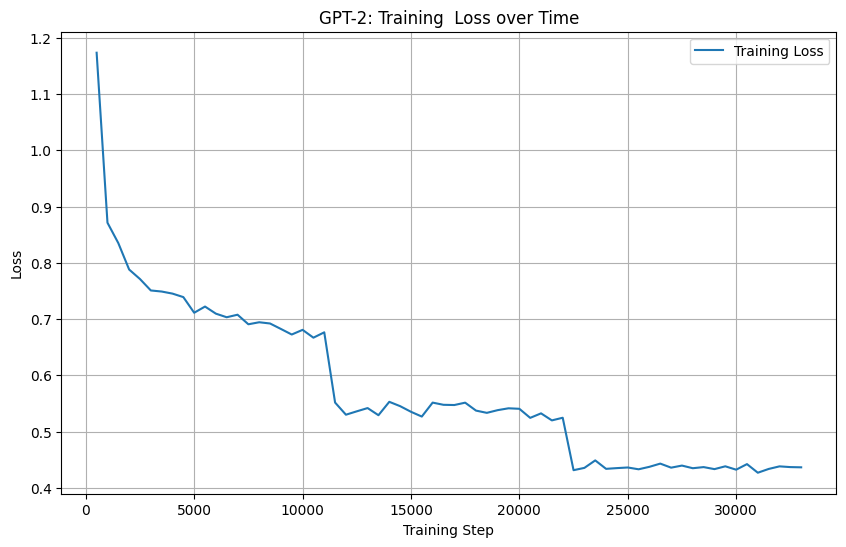

In [ ]:
import matplotlib.pyplot as plt

# 1. Extract log history
logs = trainer_gpt.state.log_history

# 2. Separate train & eval logs
train_steps, train_losses = [], []
eval_steps,  eval_losses  = [], []

for log in logs:
    if "loss" in log and "step" in log:
        train_steps.append(log["step"])
        train_losses.append(log["loss"])
    if "eval_loss" in log and "step" in log:
        eval_steps.append(log["step"])
        eval_losses.append(log["eval_loss"])

# 3. Plot both curves
plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, label="Training Loss")
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("GPT-2: Training  Loss over Time")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# === Corrected GPT-2 Evaluation with labels included ===

import numpy as np
from torch.utils.data import DataLoader
import evaluate, textstat

# 1. Ensure DataLoader yields labels too
test_tok_gpt.set_format("torch", columns=["input_ids","attention_mask","labels"])
loader = DataLoader(test_tok_gpt, batch_size=8, shuffle=False)

all_preds, all_labels = [], []

# 2. Generate summaries and collect true summaries
with torch.no_grad():
    for batch in loader:
        ids    = batch["input_ids"].to(device)
        mask   = batch["attention_mask"].to(device)
        labels = batch["labels"].cpu().tolist()           # now available
        gen_ids = model_gpt.generate(
            input_ids      = ids,
            attention_mask = mask,
            max_new_tokens = max_summary_len,
            num_beams      = 1,
        )
        all_preds.extend(gen_ids.cpu().tolist())
        # keep only the summary portion (labels were masked on article)
        all_labels.extend([lab[max_input_len:] for lab in labels])

# 3. Decode to text
decoded_preds = tokenizer_gpt.batch_decode(all_preds,  skip_special_tokens=True)
decoded_refs  = tokenizer_gpt.batch_decode(all_labels, skip_special_tokens=True)

# 4. Compute ROUGE
rouge_res = evaluate.load("rouge").compute(
    predictions=decoded_preds,
    references=decoded_refs,
    use_stemmer=True
)

# 5. Compute BERTScore
bs_res = evaluate.load("bertscore").compute(
    predictions=decoded_preds,
    references=decoded_refs,
    lang="en"
)

# 6. Compute Flesch–Kincaid grade
fk_pred = [textstat.flesch_kincaid_grade(x) for x in decoded_preds]
fk_ref  = [textstat.flesch_kincaid_grade(x) for x in decoded_refs]

# 7. Print all scores
print(f"ROUGE-1:           {rouge_res['rouge1']:.4f}")
print(f"ROUGE-2:           {rouge_res['rouge2']:.4f}")
print(f"ROUGE-L:           {rouge_res['rougeL']:.4f}")
print(f"BERTScore — F1:     {np.mean(bs_res['f1']):.4f}")
print(f"Avg FK Grade — Gen: {np.mean(fk_pred):.2f} | Ref: {np.mean(fk_ref):.2f}")

# 8. Spot-check examples
for i in range(5):
    print(f"\n— Example {i+1} —")
    print("Article:   ", test_df.iloc[i]["Short"])
    print("Reference: ", decoded_refs[i])
    print("Generated: ", decoded_preds[i])


ROUGE-1:           0.2217
ROUGE-2:           0.2017
ROUGE-L:           0.2217
BERTScore — F1:     0.8773
Avg FK Grade — Gen: 10.42 | Ref: 7.35

— Example 1 —
Article:    A refugee relief organization arranges football matches for youth and unaccompanied minors living in Syrian refugee camps in France. The matches feature 12-18 year-olds, 80% of whom have none taking care of them. &#34;Sport has given them a chance to break free from the camp, forget about the past, the present and the future, to be themselves&#34;, an official said.
Reference:  Soccer games organized for young Syrian refugees
Generated:  A refugee relief organization arranges football matches for youth and unaccompanied minors living in Syrian refugee camps in France. The matches feature 12-18 year-olds, 80% of whom have none taking care of them. &#34;Sport has given them a chance to break free from the camp, forget about the past, the present and the future, to be themselves&#34;, an official said.Soccer games organiz

In [ ]:
# Re-import and recreate comparison metrics
import pandas as pd

data = {
    'Model': ['T5-small', 'GPT-2'],
    'ROUGE-1': [0.5365, 0.2217],
    'ROUGE-2': [0.3026, 0.2017],
    'ROUGE-L': [0.4973, 0.2217],
    'BERTScore F1': [0.9061, 0.8773],
    'Avg FK Grade (Gen)': [8.21, 10.42],
    'Avg FK Grade (Ref)': [7.34, 7.35]
}
df_metrics = pd.DataFrame(data)
df_metrics


,Model,ROUGE-1,ROUGE-2,ROUGE-L,BERTScore F1,Avg FK Grade (Gen),Avg FK Grade (Ref)
0,T5-small,0.5365,0.3026,0.4973,0.9061,8.21,7.34
1,GPT-2,0.2217,0.2017,0.2217,0.8773,10.42,7.35


In [ ]:
import plotly.express as px
import pandas as pd

# 1. Prepare the metrics DataFrame
metrics = pd.DataFrame({
    'Model': ['T5', 'GPT-2'],
    'ROUGE-1': [0.5365, 0.2217],
    'ROUGE-2': [0.3026, 0.2017],
    'ROUGE-L': [0.4973, 0.2217],
    'BERTScore F1': [0.9061, 0.8773]
})

# 2. Melt into long form for Plotly
df_long = metrics.melt(id_vars='Model',
                       var_name='Metric',
                       value_name='Score')

# 3. Plot
fig = px.bar(
    df_long,
    x='Model',
    y='Score',
    color='Metric',
    barmode='group',
    title='Model Comparison: T5 vs. GPT-2',
    labels={'Score':'Score', 'Model':'Model'}
)

fig.update_layout(width=700, height=400)
fig.show()
